<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-7/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

# Transfer Learning

In deep learning, **transfer learning** refers to using a pre-trained model on a new, often related task to leverage previously learned features, rather than training a model from scratch. This technique allows models to generalize knowledge from large datasets, such as **ImageNet** for image tasks or large language corpora for text tasks, to smaller, task-specific datasets.

Here’s how transfer learning typically works in deep learning:

1. Pre-trained Model Selection: The process starts with selecting a model that has been trained on a large, general dataset. In computer vision, popular models like VGG, ResNet, or Inception are often used, whereas for NLP, models like BERT, GPT, and T5 are common. These models have learned extensive feature hierarchies, such as recognizing edges, textures, and shapes in images, or syntax and semantics in text.

2. Model Adaptation:

 * Feature Extraction: The initial layers of the pre-trained model are "frozen"
(their weights are not updated during training), and only the final layers are retrained on the new data. This method is useful when the new task has limited data and is closely related to the original task.
Fine-tuning: Here, the pre-trained model is retrained (often with a lower learning rate) on the new dataset, allowing it to refine learned features for the specific task.
 * Fine-tuning typically involves more layers of the model than feature extraction and is useful for more substantial adjustments to the new data.
Transfer

3. Learning Benefits in Deep Learning:

 * Data Efficiency: Enables effective training on smaller datasets by reusing general features learned from a large dataset.
 * Reduced Training Time: Models reach optimal performance faster as they start from a partially learned state.
 * Improved Performance: Often results in better model accuracy and generalization, especially for tasks with limited labeled data.


# Pre-built models in Computer Vision

In computer vision, there are numerous pretrained models available. Here, a few are briefly explained, but many others exist, and each should be explored to find the most suitable one for the specific task.

* **VGG** is a convolutional neural network (CNN) architecture known for its simplicity and effectiveness in image classification tasks. Developed by the Visual Geometry Group at Oxford, VGG popularized the use of smaller, 3x3 convolutional filters stacked in deep layers to capture intricate patterns, achieving high accuracy with a relatively straightforward structure. The most well-known versions, VGG-16 and VGG-19, have 16 and 19 layers respectively and are composed of multiple convolutional and pooling layers, followed by fully connected layers. Despite its high performance, VGG is computationally intensive and has many parameters, making it slower and more memory-demanding compared to more recent architectures like ResNet. VGG models have been widely used as pre-trained models for transfer learning in various computer vision applications.
* **ResNet**, short for Residual Network, is a deep convolutional neural network architecture designed to enable extremely deep networks without the issues of vanishing or exploding gradients. Developed by Microsoft Research, ResNet introduced the concept of residual connections, or shortcut connections, that bypass one or more layers, allowing the network to "skip" these layers during training if they do not improve performance. This structure enables models with hundreds or even thousands of layers, such as ResNet-50, ResNet-101, and ResNet-152, to be trained effectively. ResNet’s innovation of residual learning has significantly improved the accuracy and efficiency of deep networks, making it a foundational architecture in image recognition and a popular base for transfer learning across many computer vision tasks.
* **Inception** is a deep convolutional neural network architecture known for its "Inception modules," which allow the network to capture features at multiple scales simultaneously. Introduced by Google in the Inception family of networks (also called GoogLeNet), Inception modules perform 1x1, 3x3, and 5x5 convolutions in parallel within a single layer, then concatenate the outputs to create a richer, multi-scale representation. This architecture reduces the number of parameters and computational cost compared to standard CNNs by combining multiple filter sizes, including 1x1 convolutions that compress feature maps before applying larger filters. With various versions like Inception-v3 and Inception-v4, Inception models have achieved top performance on tasks like image classification, object detection, and transfer learning applications.
* **MobileNet** is a lightweight deep learning model designed for mobile and edge devices, focusing on efficient computation and reduced model size without sacrificing performance. Developed by Google, MobileNet utilizes depthwise separable convolutions, which split the convolution operation into two stages: a depthwise convolution that applies a single filter per input channel, followed by a pointwise convolution that combines the outputs. This innovative architecture allows MobileNet to achieve a high level of accuracy while significantly decreasing the number of parameters and computational requirements compared to traditional CNNs. As a result, MobileNet is well-suited for applications in real-time image classification, object detection, and other computer vision tasks where computational resources are limited.
* **DenseNet**, short for Densely Connected Convolutional Network, is a deep learning architecture that enhances feature propagation and reuse by connecting each layer to every other layer in a feedforward manner. This means that each layer receives inputs from all previous layers, promoting a more efficient flow of information and gradients throughout the network. Introduced by researchers at Cornell University, DenseNet addresses the vanishing gradient problem commonly found in very deep networks by facilitating direct connections between layers. The architecture significantly reduces the number of parameters compared to traditional CNNs, as it eliminates the need for redundant feature maps, while still achieving high accuracy on various tasks, such as image classification and object detection. DenseNet has been particularly effective in leveraging features across layers, leading to improved performance and robustness in deep learning applications.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Nov  5 18:55:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Import the required libraries. In **tensorFlow**, the pre-trained models and their associated preprocessing functions are organized under `tensorflow.keras.applications`. To import them, simply call the model class along with its corresponding input preprocessing function.

For example for calling Vgg16 you can import the following library:

`from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input`

For more information, check this [link](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob # glob is a module in Python used for file pattern matching, allowing users to search for files and directories based on specific wildcard patterns.
import matplotlib.pyplot as plt
import numpy as np

# Download and preprocess the dataset

This [food image dataset](https://www.epfl.ch/labs/mmspg/downloads/food-image-datasets/) contains 2,500 food and 2,500 non-food images for the task of food/non-food classification, as used in our paper, “Food/Non-food Image Classification and Food Categorization using a Pre-Trained GoogLeNet Model.” The dataset is split into three subsets: training, validation, and evaluation.

The naming convention for images is as follows:

`{ClassID}_{ImageID}.jpg`

* ClassID: 0 for non-food and 1 for food images.
* ImageID: A unique identifier for each image within the class.

In [2]:
!wget --passive-ftp --prefer-family=ipv4 --ftp-user datasets@mmspgdata.epfl.ch --ftp-password ohsh9jah4T -nc ftp://tremplin.epfl.ch/FoodImage/Food-5K.zip

--2024-10-29 00:05:18--  ftp://tremplin.epfl.ch/FoodImage/Food-5K.zip
           => ‘Food-5K.zip’
Resolving tremplin.epfl.ch (tremplin.epfl.ch)... 128.178.218.41, 2001:620:618:1da:7:80b2:da01:3
Connecting to tremplin.epfl.ch (tremplin.epfl.ch)|128.178.218.41|:21... connected.
Logging in as datasets@mmspgdata.epfl.ch ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /FoodImage ... done.
==> SIZE Food-5K.zip ... 446919921
==> PASV ... done.    ==> RETR Food-5K.zip ... done.
Length: 446919921 (426M) (unauthoritative)

Food-5K.zip         100%[===================>] 426.22M  35.8MB/s    in 13s     

2024-10-29 00:05:46 (34.0 MB/s) - ‘Food-5K.zip’ saved [446919921]



Unzip the zipped file and take a look and its training folder.

In [3]:
!unzip -qq -o Food-5K.zip
!ls -U training | head -20 # show files under the training folder

1_816.jpg
0_717.jpg
0_987.jpg
1_892.jpg
0_327.jpg
1_303.jpg
0_309.jpg
0_223.jpg
0_1419.jpg
1_711.jpg
1_760.jpg
0_1070.jpg
1_1267.jpg
1_952.jpg
0_675.jpg
0_829.jpg
1_0.jpg
1_1153.jpg
0_762.jpg
1_75.jpg


Files beginning with '1' are labeled as food, while those beginning with '0' are labeled as non-food.

Text(0.5, 1.0, 'Food')

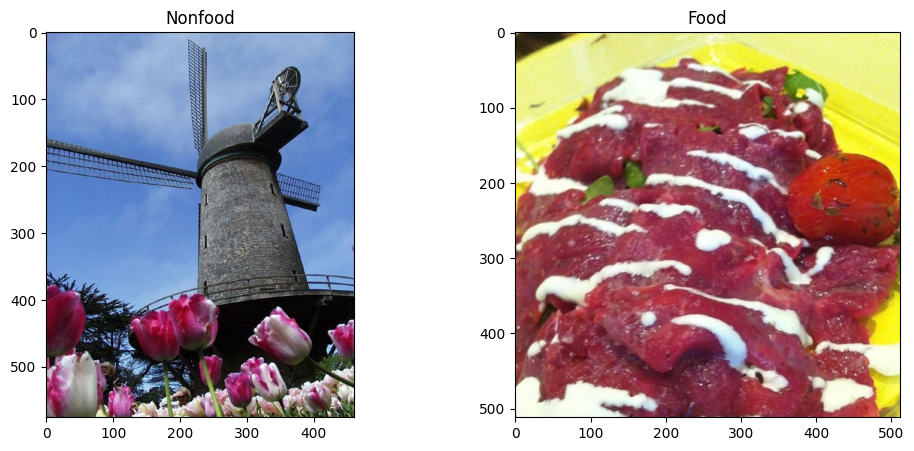

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot
axs[0].imshow(image.load_img('training/0_809.jpg'))
axs[0].set_title('Nonfood')

# Plot on the second subplot
axs[1].imshow(image.load_img('training/1_610.jpg'))
axs[1].set_title('Food')

The issue is that the data is not in the required format. We need each class of images to be organized into separate folders within the train and test directories.

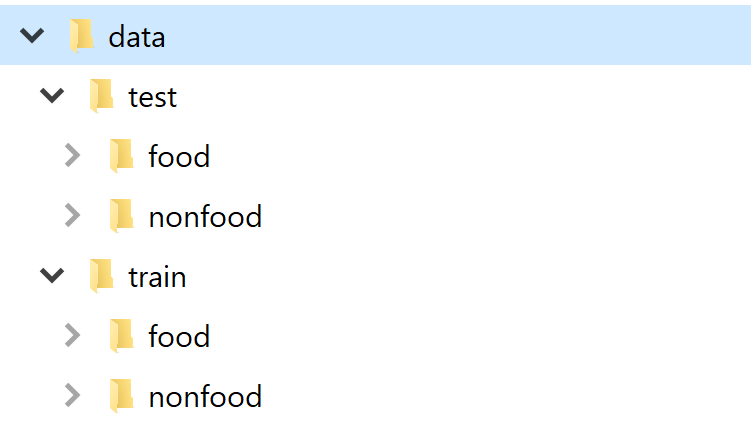

Creat folders and move files under their given folders.

In [5]:
# creat folders
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food
# move data to their given folders
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food

Create the `image_files` and `test_image_files`. Since these images are quite large and vary in size, let’s load them all at a smaller, uniform size (100 x 100).

In [6]:
train_path = 'data/train'
test_path = 'data/test'
IMAGE_SIZE = [100, 100]
image_files = glob(train_path + '/*/*.jpg')
test_image_files = glob(test_path + '/*/*.jpg')

#Download the pretrained model
Instantiate the model with an input shape based on the `IMAGE_SIZE` plus 3 color channels. Since the model is pretrained, the weights need to be downloaded, so the source must be specified. Here, we will download the pretrained `VGG` model on **ImageNet**, so we set the weights parameter to `'imagenet'`. Finally, as we plan to replace the head, we set `include_top=False`.

In [7]:
vgg16 = VGG16(input_shape=IMAGE_SIZE+[3],
              weights = 'imagenet',
              include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


We don’t need to train this model, so we’ll keep it frozen.

In [8]:
vgg16.trainable = False

# Build the model

We only need to map the `VGG` output to a feature vector, so adding a `Flatten()` layer will be sufficient to build the model.

In [9]:
x= Flatten()(vgg16.output)
model = Model(inputs = vgg16.input, outputs=x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Extract feature vectors

As noted, there are no trainable parameters for this model because we intend to use this part as is.

Before proceeding, some additional steps are necessary. First, we need to define a generator to process data on the fly using `ImageDataGenerator`, along with specifying the data flow for the train and test datasets. Since our goal is to distinguish food from non-food, this model will be set up for binary classification.

In [10]:
batch_size = 128

gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = gen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary',
)

test_generator = gen.flow_from_directory(
    test_path,
    target_size = IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary',
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


We use the `VGG` model to generate `feature vectors` for all images, so it does not need to be included in the training process. To achieve this, we pass all images through the model to create their associated feature vectors. From this point on, these feature vectors become the input data for a simple `logistic regression` model, allowing us to set aside the `VGG` model.

In [11]:
train = len(image_files) # number of train samples
test = len(test_image_files) # number of test samples

sample = model.predict(np.random.random([1]+IMAGE_SIZE + [3])) # measure the size of feature vectors
D = sample.shape[1]

X_train = np.zeros((train,D))
Y_train = np.zeros((train))
X_test = np.zeros((test,D))
Y_test = np.zeros((test))

# passing training images through the vgg model
i = 0
for x,y in train_generator:
  features = model(x)
  meas = len(y)

  X_train[i:i+meas]=features
  Y_train[i:i+meas]=y
  i+=meas
  if i>= train:
    break

# passing testing images through the vgg model
i = 0
for x,y in test_generator:
  features = model(x)
  meas = len(y)

  X_test[i:i+meas]=features
  Y_test[i:i+meas]=y
  i+=meas
  if i>= test:
    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Since the range of the input data is quite large, we need to scale it down to a smaller range. To do this, we can simply use the `StandardScaler` from `sklearn`.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Logistic Regression
We can now build a simple [logistic regression](https://github.com/tahamsi/computer-vision/blob/main/week-6/Logistic_Regression.ipynb) model, consisting of one dense layer with a `sigmoid` activation function. This model serves as the new head for the `VGG` model to carry out the binary classification task, and only this part will be trained.

In [13]:
i = Input(shape=(D,))
x = Dense(1, activation = 'sigmoid')(i)
logit = Model(i,x)

In [14]:
# Compile the logit model
logit.compile(
    loss= 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [15]:
# Fit/Train the logit model
history = logit.fit(X_train, Y_train, batch_size=batch_size, epochs=10, validation_data=(X_test,Y_test),)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8004 - loss: 0.4089 - val_accuracy: 0.9560 - val_loss: 0.1137
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9714 - loss: 0.0896 - val_accuracy: 0.9640 - val_loss: 0.0964
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0495 - val_accuracy: 0.9640 - val_loss: 0.0935
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0360 - val_accuracy: 0.9650 - val_loss: 0.0912
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9959 - loss: 0.0274 - val_accuracy: 0.9670 - val_loss: 0.0894
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9990 - loss: 0.0198 - val_accuracy: 0.9680 - val_loss: 0.0893
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0164 - val_accuracy: 0.9650 - val_loss: 0.0890
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9997 - loss: 0.0140 - val_accuracy: 0.9660 - val_loss

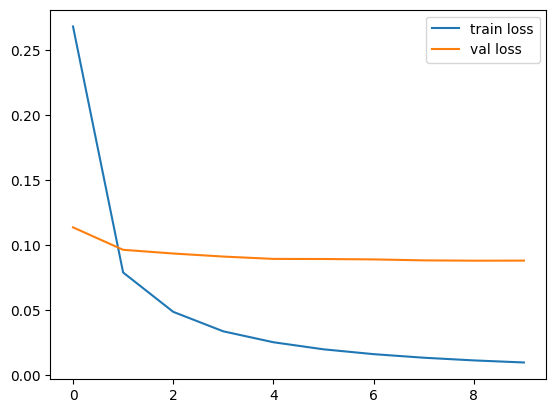

In [16]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [17]:
print(logit.evaluate(X_test,Y_test))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9665 - loss: 0.0903 
[0.08808745443820953, 0.9649999737739563]


As noted, the convergence is remarkably fast, and the model's performance on the test dataset is very high.